<a href="https://colab.research.google.com/github/tgarcia14/DigitalBuilders/blob/main/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Regression

# Data Science 4330
Team name Digital Builders
by .edu Kevin Minzenmayer and YaeEun Yi

1.   Tony Garcia - tgarcia14@angelo.edu
2.   Kevin Minzenmayer - kminzenmayer@angelo.edu
3.   YaeEun Yi - yyi@angelo.edu



https://catalog.data.gov/dataset/data-breach-notifications-affecting-washington-residents

Data Breaches affecting Washington residents from 2017 to 2024

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
import scipy.stats as stats
import statsmodels as sm
from sklearn.preprocessing import PolynomialFeatures
from mpl_toolkits import mplot3d
import statsmodels.api as sm
from sklearn.feature_selection import r_regression

This data source comes from data.gov with a direct link [Here]( https://catalog.data.gov/dataset/data-breach-notifications-affecting-washington-residents)

This data shows security incidents that have happened in the state of washinton, what was the cause, and how many were affected by the incidents.


In [ ]:
import requests
url = 'https://data.wa.gov/api/views/sb4j-ca4h/rows.json?accessType=DOWNLOAD'
response = requests.get(url)
data = response.json()
records = data['data']
column_names = [column['name'] for column in data['meta']['view']['columns']]
data_breach_df = pd.DataFrame(records, columns=column_names)

the cleaned dataframe is brought in

In [ ]:
# Copy the DataFrame to avoid modifying the original
cleaned_df = data_breach_df.copy()

# Remove unnecessary columns (if any)
# Example: Drop columns like 'ID' or any irrelevant text-heavy fields
cleaned_df = cleaned_df.drop(['DateEnd'], axis=1)
cleaned_df = cleaned_df.drop(['Id'], axis=1)
cleaned_df = cleaned_df.drop(['EntityState'], axis=1)
# Handle missing values
# Here, missing data with impute data
cleaned_df['CyberattackType'] = cleaned_df['CyberattackType'].fillna('Other')
cleaned_df['BusinessType'] = cleaned_df['BusinessType'].fillna('Other')
cleaned_df['DataBreachCause'] = cleaned_df['DataBreachCause'].fillna('Unknown/unclear')

# Convert data types if needed
# Convert 'DateAware' and 'DateSubmitted' columns to datetime objects for analysis
cleaned_df['DateAware'] = pd.to_datetime(cleaned_df['DateAware'])
cleaned_df['DateSubmitted'] = pd.to_datetime(cleaned_df['DateSubmitted'])

# Standardize string values (if needed)
# Example: Convert all string data to lowercase for consistency
for column in cleaned_df.select_dtypes(include=['object']):
    cleaned_df[column] = cleaned_df[column].str.lower()

#Converts WashingtonAffected to an INT
cleaned_df['WashingtoniansAffected'] = cleaned_df['WashingtoniansAffected'].fillna(0).astype(int)
cleaned_df['WashingtoniansAffected'] = cleaned_df['WashingtoniansAffected'].astype(int)
# Remove duplicates
cleaned_df = cleaned_df.drop_duplicates()

# Check for inconsistencies or outliers in numeric columns
# Example: Check for outliers in 'WashingtoniansAffected' and 'DaysToContainBreach'
print(cleaned_df['WashingtoniansAffected'].describe())
print(cleaned_df['DaysToContainBreach'].describe())

# Optional: Handle specific outliers or inconsistencies
# Example: Remove extreme outliers based on domain knowledge
# cleaned_df = cleaned_df[cleaned_df['WashingtoniansAffected'] < threshold_value]
# Mean imputation for 'DaysToContainBreach' column
####
cleaned_df['DaysToContainBreach'] = pd.to_numeric(cleaned_df['DaysToContainBreach'], errors='coerce')
cleaned_df['DaysToContainBreach'] = cleaned_df['DaysToContainBreach'].fillna(cleaned_df['DaysToContainBreach'].mean()).astype(int)

#Mean imputation for  Days to Identify and conversion to Int
####
cleaned_df.loc[:, 'DaysToIdentifyBreach'] = pd.to_numeric(cleaned_df['DaysToIdentifyBreach'], errors='coerce')
cleaned_df['DaysToIdentifyBreach'] = cleaned_df['DaysToIdentifyBreach'].fillna(cleaned_df['DaysToIdentifyBreach'].mean()).astype(int)
# Mean imputations for Days of exposure and conversion to Int
cleaned_df.loc[:, 'DaysOfExposure'] = pd.to_numeric(cleaned_df['DaysOfExposure'], errors='coerce')
cleaned_df['DaysOfExposure'] = cleaned_df['DaysOfExposure'].fillna(cleaned_df['DaysOfExposure'].mean()).astype(int)

#Mean imputation for DaysBreachLifecycle and conversion to Int
cleaned_df.loc[:, 'DaysBreachLifecycle'] = pd.to_numeric(cleaned_df['DaysBreachLifecycle'], errors='coerce')
cleaned_df['DaysBreachLifecycle'] = cleaned_df['DaysBreachLifecycle'].fillna(cleaned_df['DaysBreachLifecycle'].mean()).astype(int)

#DaysElapsedBetweenEndAndDiscovery
cleaned_df.loc[:, 'DaysElapsedBetweenEndAndDiscovery'] = pd.to_numeric(cleaned_df['DaysElapsedBetweenEndAndDiscovery'], errors='coerce')
cleaned_df['DaysElapsedBetweenEndAndDiscovery'] = cleaned_df['DaysElapsedBetweenEndAndDiscovery'].fillna(cleaned_df['DaysElapsedBetweenEndAndDiscovery'].mean()).astype(int)

#DaysElapsedBeforeNotification
cleaned_df.loc[:, 'DaysElapsedBeforeNotification'] = pd.to_numeric(cleaned_df['DaysElapsedBeforeNotification'], errors='coerce')
cleaned_df['DaysElapsedBeforeNotification'] = cleaned_df['DaysElapsedBeforeNotification'].fillna(cleaned_df['DaysElapsedBeforeNotification'].mean()).astype(int)


cleaned_df.drop('sid', axis=1, inplace=True)
cleaned_df.drop('id', axis=1, inplace=True)
cleaned_df.drop('position', axis=1, inplace=True)
cleaned_df.drop('created_at', axis=1, inplace=True)
cleaned_df.drop('created_meta', axis=1, inplace=True)
cleaned_df.drop('updated_at', axis=1, inplace=True)
cleaned_df.drop('updated_meta', axis=1, inplace=True)
cleaned_df.drop('meta', axis=1, inplace=True)

cleaned_df['DateStart'] = pd.to_datetime(cleaned_df['DateStart'])

cleaned_df['Year'] = cleaned_df['Year'].astype(int)
cleaned_df['YearText'] = cleaned_df['YearText'].astype(int)
# Show the first few rows of the cleaned dataset
cleaned_df.head(200)

count    1.213000e+03
mean     3.035297e+04
std      1.783883e+05
min      0.000000e+00
25%      8.100000e+02
50%      1.687000e+03
75%      6.586000e+03
max      3.243664e+06
Name: WashingtoniansAffected, dtype: float64
count     982
unique     62
top         0
freq      771
Name: DaysToContainBreach, dtype: object


<ipython-input-30-5c41cdc840c1>:47: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cleaned_df['DaysToIdentifyBreach'] = cleaned_df['DaysToIdentifyBreach'].fillna(cleaned_df['DaysToIdentifyBreach'].mean()).astype(int)
<ipython-input-30-5c41cdc840c1>:50: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cleaned_df['DaysOfExposure'] = cleaned_df['DaysOfExposure'].fillna(cleaned_df['DaysOfExposure'].mean()).astype(int)
<ipython-input-30-5c41cdc840c1>:54: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a f

,DateAware,DateSubmitted,DataBreachCause,DateStart,Name,CyberattackType,WashingtoniansAffected,IndustryType,BusinessType,Year,...,BreachLifecycleRange,DaysToContainBreach,DaysToIdentifyBreach,DaysBreachLifecycle,DiscoveredInProgress,DaysOfExposure,DaysElapsedBetweenEndAndDiscovery,EndedOnDayDiscovered,DaysElapsedBeforeNotification,DaysOfExposureRange
0,2021-02-04,2021-03-17,cyberattack,2021-02-04,automatic funds transfer services inc.,ransomware,695,finance,other,2021,...,1-99,4,0,4,True,4,72,False,41,1-99
1,2019-12-20,2021-03-17,cyberattack,NaT,pcs revenue control systems,phishing,11807,business,professional services,2021,...,unknown,5,118,123,False,93,72,False,453,unknown
2,2021-02-22,2021-03-17,cyberattack,2020-12-24,western union retail money transfer partner,malware,1555,finance,other,2021,...,1-99,0,60,60,False,5,55,False,23,1-99
3,2020-05-24,2021-03-18,cyberattack,2020-05-24,manson counstruction co.,unclear/unknown,1049,business,construction,2021,...,unknown,5,0,123,False,93,72,False,298,unknown
4,2021-01-18,2021-03-19,cyberattack,2021-01-12,cancer treatment centers of america,phishing,579,health,other,2021,...,1-99,0,6,6,True,6,72,True,60,1-99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,2020-07-13,2020-08-19,cyberattack,2020-05-13,american payroll association,malware,548,business,other,2021,...,1-99,0,61,61,True,61,72,True,37,1-99
196,2020-07-16,2020-08-18,cyberattack,2020-02-07,university of south carolina,ransomware,1165,education,other,2021,...,100-199,0,160,160,False,103,57,False,33,100-199
197,2020-07-16,2020-08-17,cyberattack,2020-02-07,washington state university foundation,ransomware,334219,non-profit/charity,other,2021,...,100-199,0,160,160,False,103,57,False,32,100-199
198,2020-07-17,2020-08-17,cyberattack,2020-02-07,phi kappa psi fraternity,ransomware,677,finance,other,2021,...,100-199,0,161,161,False,103,58,False,31,100-199


the pairplot is here to identify any relationships among the data

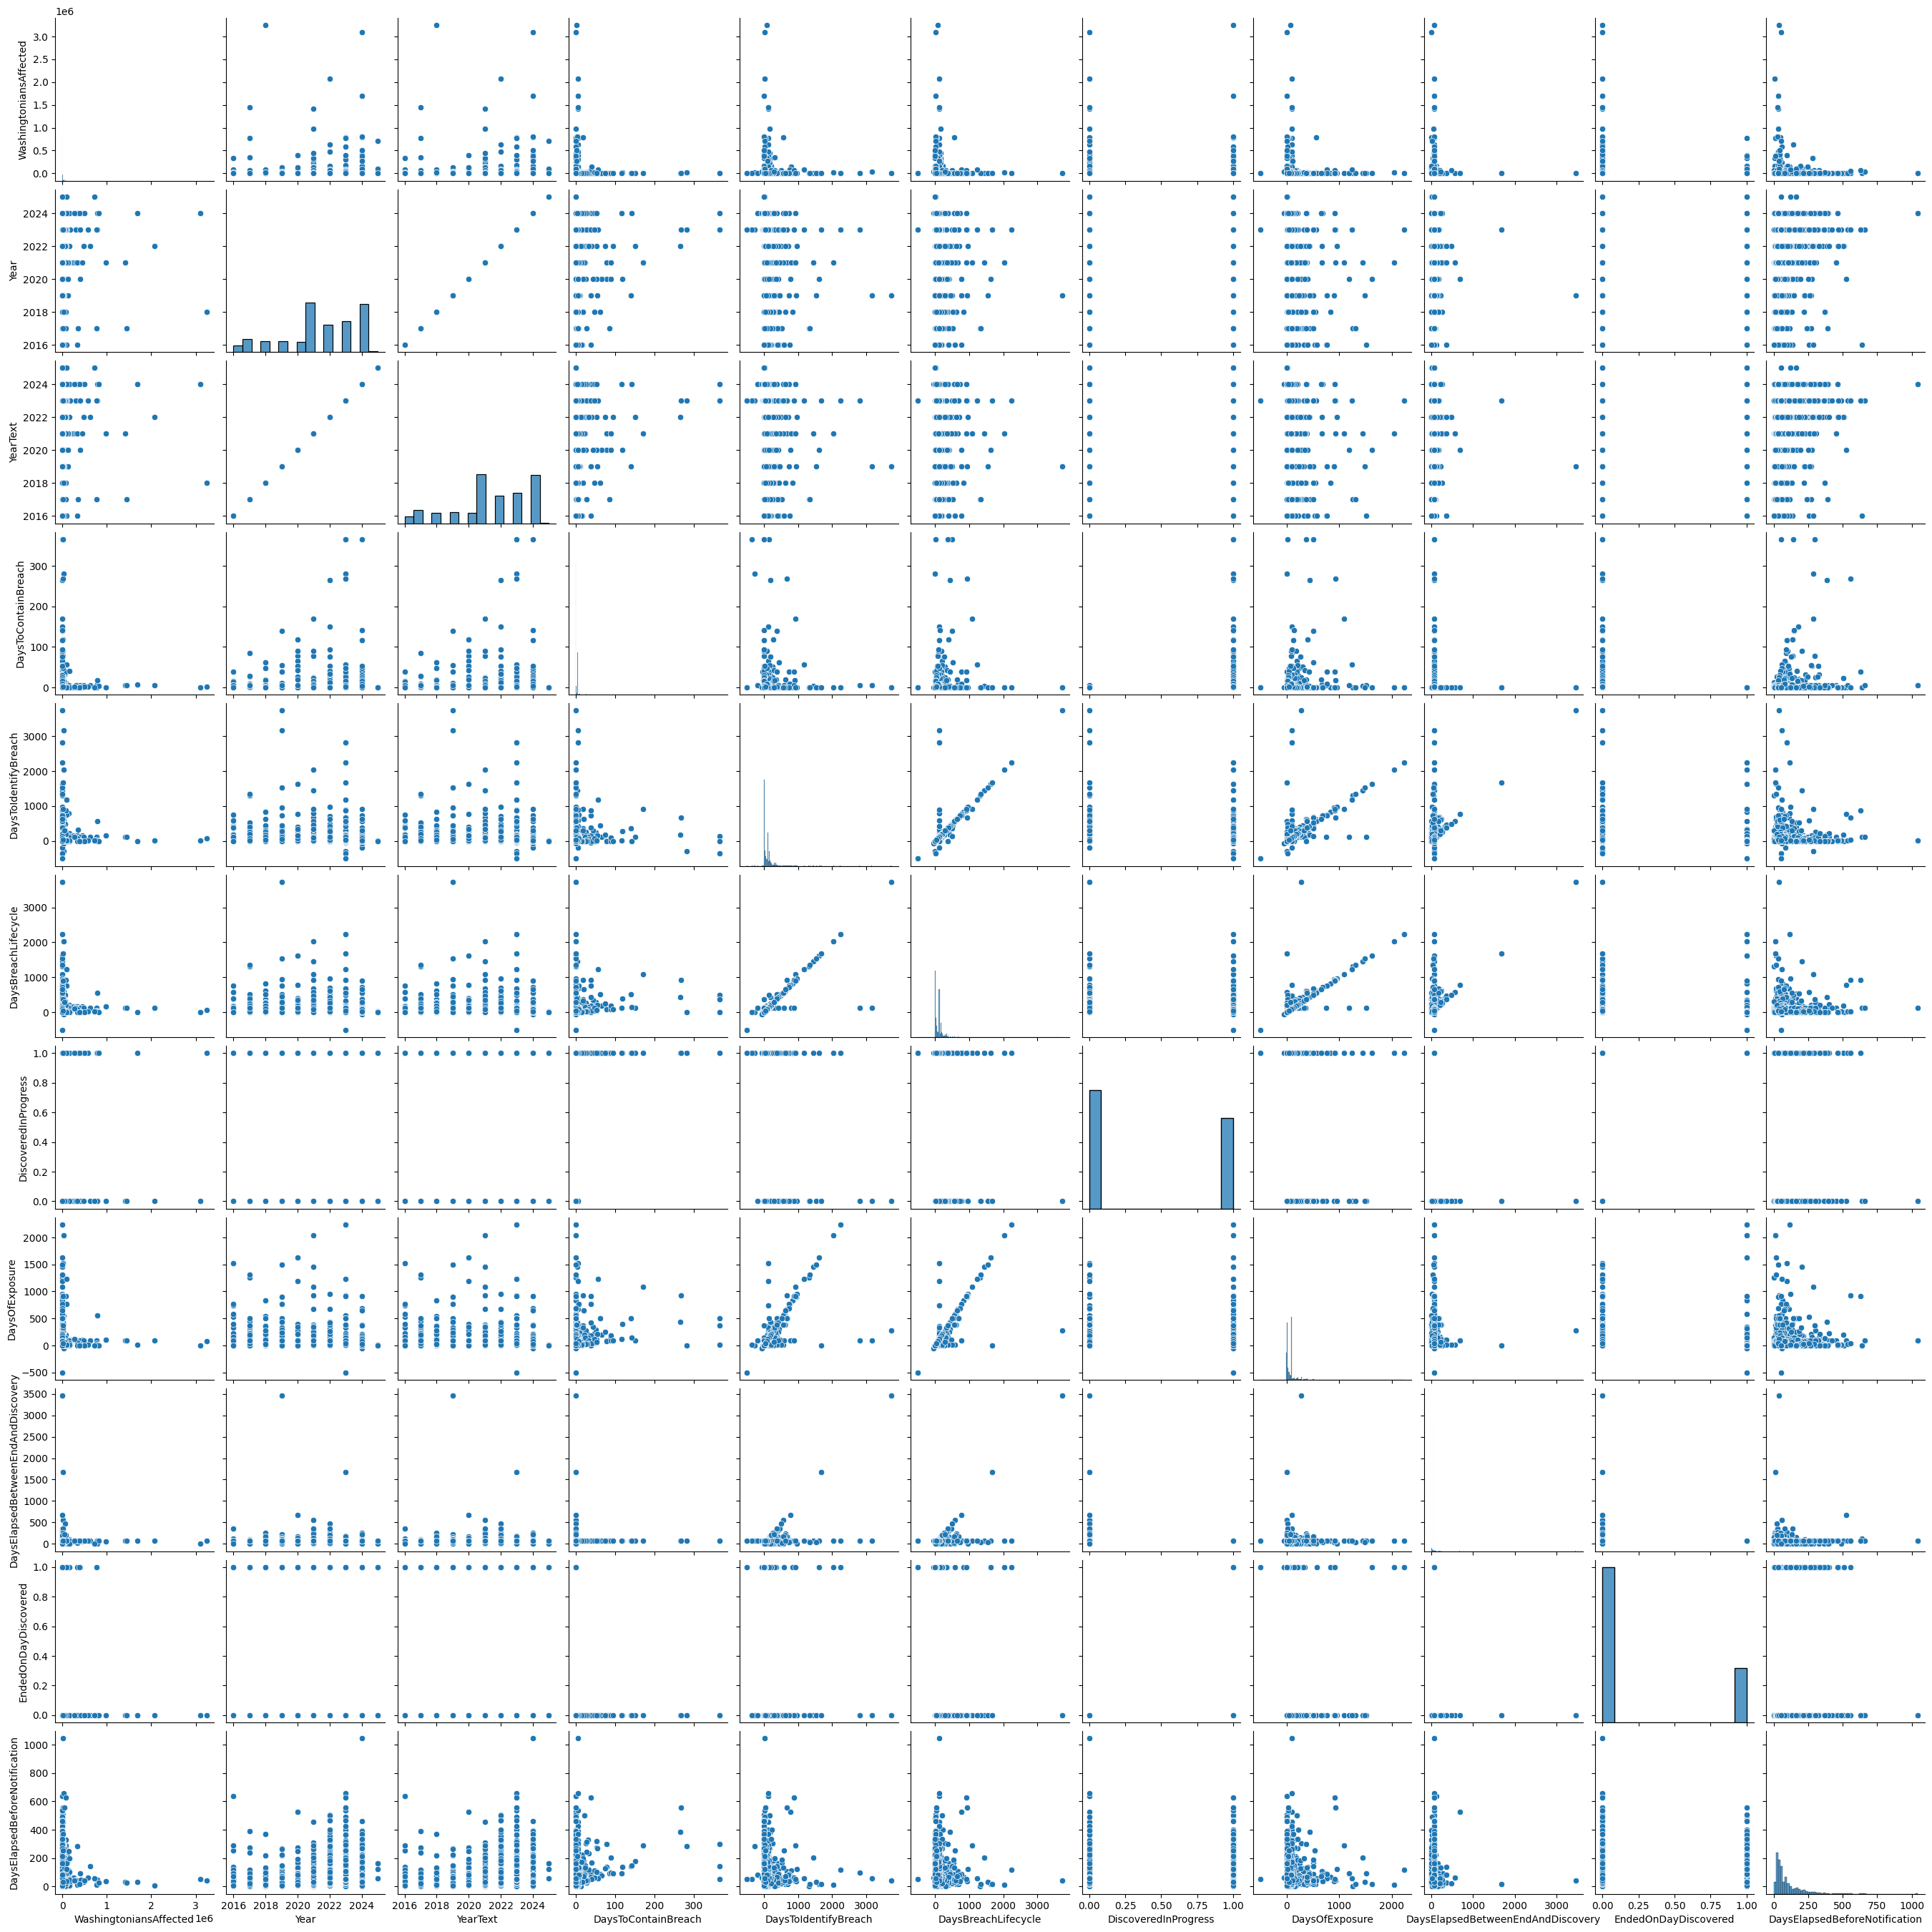

In [ ]:
sns.pairplot(cleaned_df)

numerical values are compared here

In [ ]:
cleaned_df[['DaysToContainBreach','DaysToIdentifyBreach','DaysBreachLifecycle','DaysOfExposure','DaysElapsedBetweenEndAndDiscovery','DaysElapsedBeforeNotification']]

,DaysToContainBreach,DaysToIdentifyBreach,DaysBreachLifecycle,DaysOfExposure,DaysElapsedBetweenEndAndDiscovery,DaysElapsedBeforeNotification
0,4,0,4,4,72,41
1,5,118,123,93,72,453
2,0,60,60,5,55,23
3,5,0,123,93,72,298
4,0,6,6,6,72,60
...,...,...,...,...,...,...
1208,0,4,4,3,1,164
1209,0,16,16,2,14,55
1210,0,9,9,9,72,164
1211,0,0,0,0,72,161


In [ ]:
df = cleaned_df

# A linear regression is plotted below.

The significant outliers are removed using their z_score, those that fall outside 99.7% of the distribution. Other plots look skewed but with a large enough sample, and very few values far away from the mean, a normal distribution can be used. Using the pairplot there are a couple of plots of the numerical data that appear normal.

In [ ]:
copy = df
copy['z_scoreX'] = (copy['DaysBreachLifecycle'] - copy['DaysBreachLifecycle'].mean()) / copy['DaysBreachLifecycle'].std()
copy = copy.loc[copy['z_scoreX'].abs() <= 3]

copy['z_scoreY'] = (copy['DaysOfExposure'] - copy['DaysOfExposure'].mean()) / copy['DaysOfExposure'].std()
copy = copy.loc[copy['z_scoreY'].abs() <= 3]

copy = copy.loc[copy['DaysOfExposure'] >= 0]

<ipython-input-34-acdfd6f17f43>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  copy['z_scoreY'] = (copy['DaysOfExposure'] - copy['DaysOfExposure'].mean()) / copy['DaysOfExposure'].std()


**Regression Summary**

This code predicts the dependent variable or Y variable, DaysOfExposure, based on the independent variable or X varible, DaysBreachLifecycle.

This type of prediction is useful for understanding the relationship between breach lifecycle duration and exposure duration within the state of Washington.

Plot the model

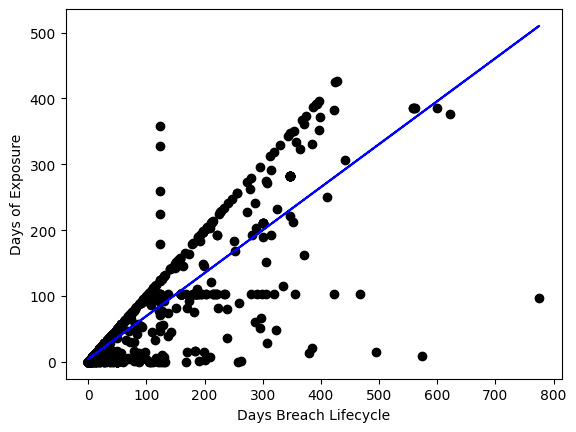

In [ ]:
X = copy[['DaysBreachLifecycle']].values.reshape(-1,1)
y = copy[['DaysOfExposure']].values.reshape(-1,1)
linModel = LinearRegression()
linModel.fit(X, y)
yPred = linModel.predict(X)
plt.scatter(X, y, color='black')
plt.plot(X, yPred, color='blue')
plt.xlabel('Days Breach Lifecycle')
plt.ylabel('Days of Exposure')
plt.show()


 The plot displays a positive association between these two variables, meaning that as the days of breach lifecycle increase, the days of exposure also tend to increase.

The r_squared value is good enough that it supports there is a positive association. The impact can vary from one case to the other with how long the lifecycle, or the affect the breach had, versus how long the breach was exposed.

In [ ]:
r = r_regression(X, np.ravel(y))[0]
print('r = ', r)
print('r_squared = ', r**2)

r =  0.8501680098893224
r_squared =  0.722785645039171


The values on the changed data are far less than the previous outliers

The value of the residuals can be fairly high,
which is why r-squared isn't any larger

The same plot is shown with the residuals

Text(0, 0.5, 'Days of Exposure')

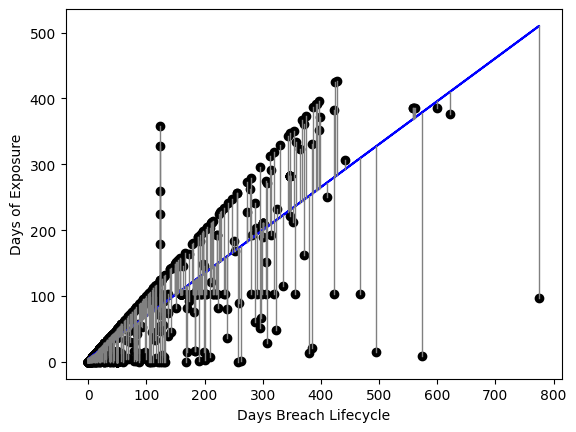

In [ ]:
plt.scatter(X, y, color='black')
plt.plot(X, yPred, color='blue')
for i in range(len(X)):
    plt.plot([X[i], X[i]], [y[i], yPred[i]], color='grey', linewidth=1)
plt.xlabel('Days Breach Lifecycle')
plt.ylabel('Days of Exposure')

On average the residuals tend to increase

# Multiple variables are plotted together

Three variables are looked at in 2D with removed outliers before plotting together

In [ ]:
copy['z_scoreX'] = (copy['DaysToIdentifyBreach'] - copy['DaysToIdentifyBreach'].mean()) / copy['DaysToIdentifyBreach'].std()
copy = copy.loc[copy['z_scoreX'].abs() <= 3]
copy = copy.loc[copy['DaysToIdentifyBreach'] >= 0]

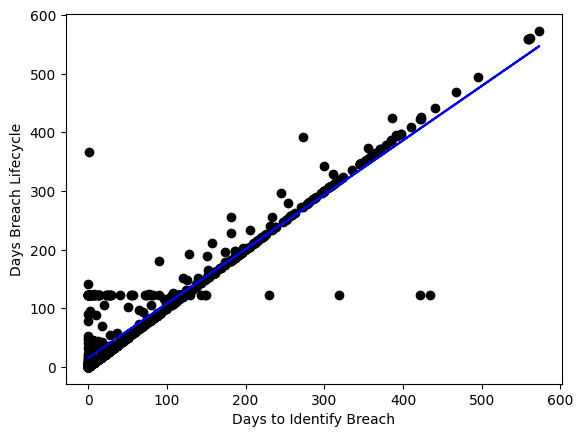

In [ ]:
X = copy[['DaysToIdentifyBreach']].values.reshape(-1,1)
y = copy[['DaysBreachLifecycle']].values.reshape(-1,1)
linModel = LinearRegression()
linModel.fit(X, y)
yPred = linModel.predict(X)
plt.scatter(X, y, color='black')
plt.plot(X, yPred, color='blue')
plt.xlabel('Days to Identify Breach')
plt.ylabel('Days Breach Lifecycle')
plt.show()

These two features look like there is a stronger relationship and a high r-squared value supports a strong positive association, although they may not be independent from one another

In [ ]:
r = r_regression(X, np.ravel(y))[0]
print('r = ', r)
print('r_squared = ', r**2)

r =  0.9450280735349197
r_squared =  0.8930780597691216


Third plot, this is just to help with the multiple variable regression, or the three dimensional plot

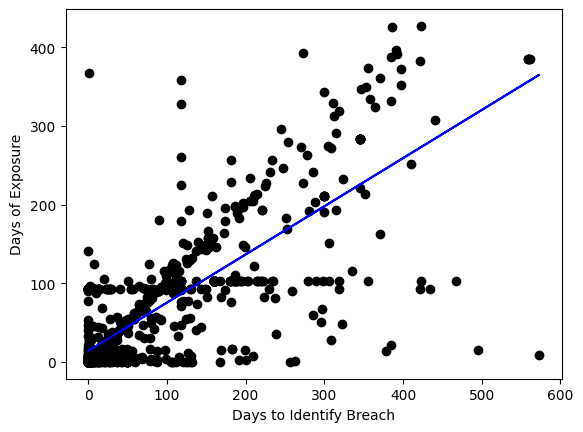

In [ ]:
X = copy[['DaysToIdentifyBreach']].values.reshape(-1,1)
y = copy[['DaysOfExposure']].values.reshape(-1,1)
linModel = LinearRegression()
linModel.fit(X, y)
yPred = linModel.predict(X)
plt.scatter(X, y, color='black')
plt.plot(X, yPred, color='blue')
plt.xlabel('Days to Identify Breach')
plt.ylabel('Days of Exposure')
plt.show()

This model doesnt suggest there is any nonlinear trend

In [ ]:
r = r_regression(X, np.ravel(y))[0]
print('r = ', r)
print('r_squared = ', r**2)

r =  0.7893227762411115
r_squared =  0.6230304450929757


The Days of Exposure appears to vary the most out of the three features, there is a weaker trend

A linear regression is done for the three features.

*   DaysToIdentifyBreach
*   DaysBreachLifecycle
*   DaysOfExposure

Text(0.5, 0, 'Days Breach Lifecycle')

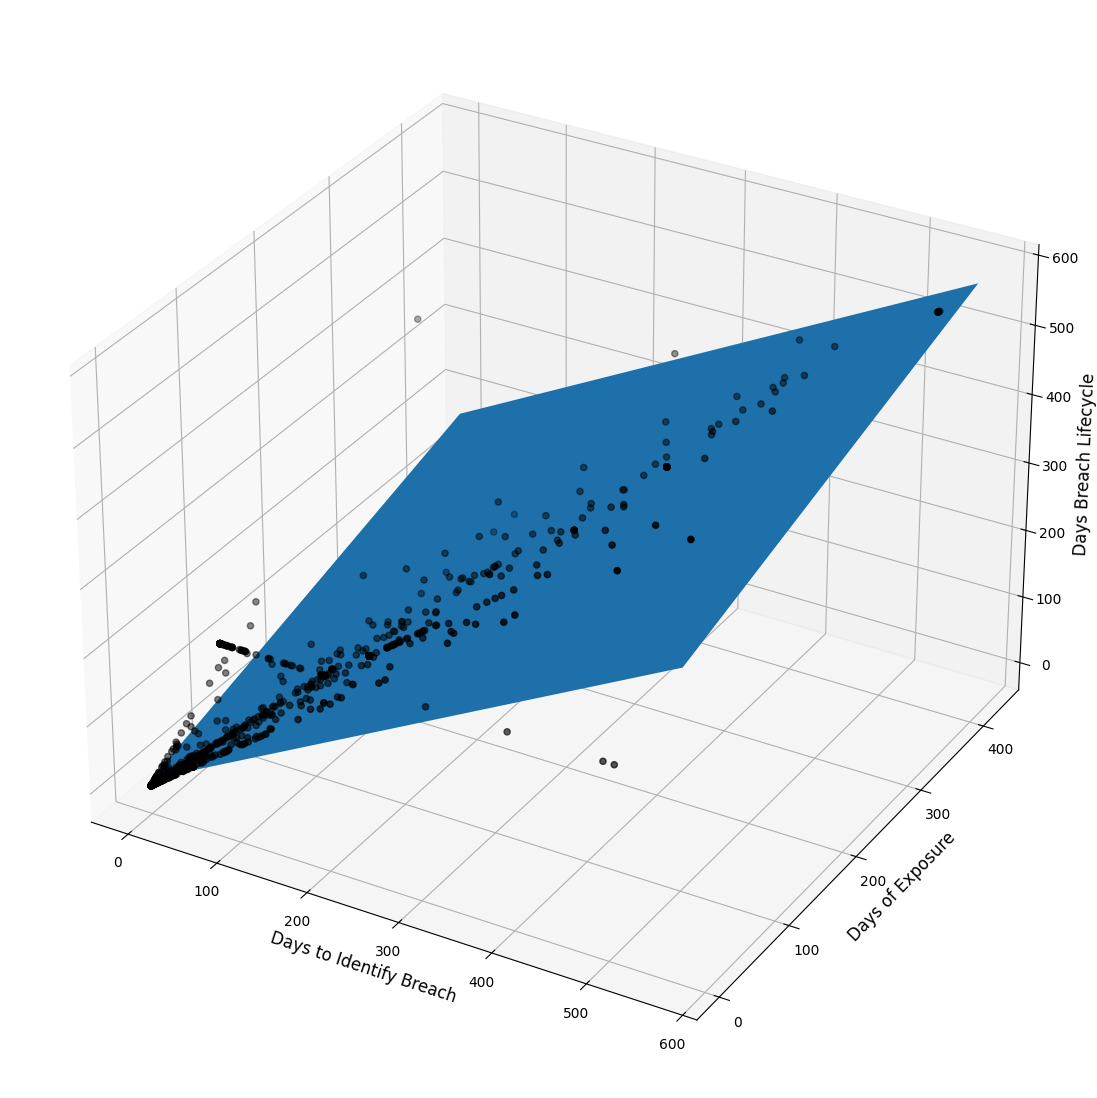

In [ ]:
X = copy[['DaysToIdentifyBreach', 'DaysOfExposure']].values.reshape(-1,2)
y = copy[['DaysBreachLifecycle']].values.reshape(-1,1)
linModel = LinearRegression()
linModel.fit(X, y)
fig = plt.figure(figsize=(14,14))
ax = plt.axes(projection='3d')
ax.scatter3D(X[:,0], X[:,1], y, color='black')
xDaysToIdentifyBreach, xDaysOfExposure = np.meshgrid(
    np.linspace(X[:,0].min(), X[:,0].max(), 2),
    np.linspace(X[:,1].min(), X[:,1].max(), 2),
)
yDaysBreachLifecycle = (linModel.intercept_[0]
                        + linModel.coef_[0,0] * xDaysToIdentifyBreach
                        + linModel.coef_[0,1] * xDaysOfExposure
)
ax.plot_surface(xDaysToIdentifyBreach, xDaysOfExposure, yDaysBreachLifecycle)
ax.set_xlabel('Days to Identify Breach',fontsize=12)
ax.set_ylabel('Days of Exposure',fontsize=12)
ax.set_zlabel('Days Breach Lifecycle',fontsize=12)

This 3D plot works in colab, but there might be a problem with jupyter. All the packeges are installed.

#Logistic Regression

 This plot shows the number of people in DC affected and whether or not the breach was caught in the first day.

<ipython-input-44-99b1a4b47718>:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  EOD.loc[EOD['EndedOnDayDiscovered'] == True, 'EndedOnDayDiscovered'] = 1


Text(0, 0.5, 'Ended on Day Discovered')

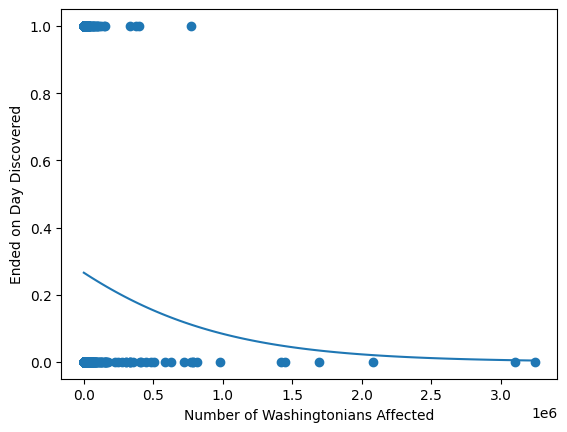

In [ ]:
#WashingtoniansAffected EndededOnDayDiscovered
EOD = df
EOD.loc[EOD['EndedOnDayDiscovered'] == True, 'EndedOnDayDiscovered'] = 1
EOD.loc[EOD['EndedOnDayDiscovered'] == False, 'EndedOnDayDiscovered'] = 0
X = EOD[['WashingtoniansAffected']].values.reshape(-1,1)
y = EOD[['EndedOnDayDiscovered']].values.reshape(-1,1).astype(int)
logisticModel = LogisticRegression()
logisticModel.fit(X, np.ravel(y.astype(int)))
plt.scatter(X, y)
xDelta = np.linspace(X.min(), X.max(), 100)
yPred = logisticModel.predict(X).reshape(-1,1).astype(int)
yDeltaProb = logisticModel.predict_proba(xDelta.reshape(-1,1))[:,1]
plt.plot(xDelta, yDeltaProb)
plt.xlabel('Number of Washingtonians Affected')
plt.ylabel('Ended on Day Discovered')

looking at the pairplot, there does not appear to be any good logistic regression trends in this data

These breaches happen fast and can affect a lot of people, and sometimes quickly is not enough. When a breach is not found quickly there are a lot more people who can be affected.

In [ ]:
prob = logisticModel.predict_proba([[0]])
print('Probability of going unnoticed during the first day:', prob[0][0])
print('Probability found on the first day', prob[0][1])

Probability of going unnoticed during the first day: 0.7344555821281038
Probability found on the first day 0.26554441787189614


There appears to be a 75% chance the breach was found on the first day

# Conclusion

The Days of Exposure is not as affected one way or the other as the other values are. It has a higher variation at larger values while the others don't. The other two linear plots show that. There is a chance of being larger if the breach goes unnoticed longer.